In [209]:
import pandas as pd
import numpy as np
import seaborn as sns
# from mlxtend.frequent_patterns import apriori, association_rules
# from mlxtend.preprocessing import TransactionEncoder

In [210]:
data = pd.read_csv("dataset/recipe_dataset.csv")
data = data.head(10000)
data = data.drop(data.columns[0], axis=1)

data

,recipe_id,recipe_name,url,recipe_Ingredients,Instructions,cuisine,Prep Time in Minutes
0,1,Super Easy Slow Cooker Chicken Enchilada Meat,https://www.allrecipes.com/recipe/228367/super...,"2 cups chicken broth, 1 (14.5 ounce) can diced...","Place chicken broth, tomatoes, flour, chili po...",['Mexican Inspired'],480
1,2,Avocado Quick Bread,https://www.allrecipes.com/recipe/27341/avocad...,"2.6666667461395 cups all-purpose flour, 1.5 te...",Preheat the oven to 350 degrees F (175 degrees...,['American'],60
2,3,Quick and Easy Baked Fish Fillet,https://www.allrecipes.com/recipe/256348/quick...,"1 pound flounder fillets, 0.5 teaspoon salt, g...",Gather all ingredients. Preheat the oven to 40...,['American'],25
3,4,Roasted Kohlrabi,https://www.allrecipes.com/recipe/203975/roast...,"4 kohlrabi bulbs, peeled, 1 tablespoon olive o...",Preheat the oven to 450 degrees F (230 degrees...,['American'],20
4,5,Custard Buttercream,https://www.allrecipes.com/recipe/262379/custa...,"1 egg, 1 cup white sugar, 0.5 cup milk, 1.3333...","Beat egg with a fork in a small, heavy saucepa...",['German'],10
...,...,...,...,...,...,...,...
9995,9996,Earthquake Cookies,https://www.allrecipes.com/recipe/10904/earthq...,"1 (18.25 ounce) package devil's food cake mix,...","Mix cake mix, eggs, shortening, and water in a...",['American'],10
9996,9997,Pistachio-Crusted Salmon,https://www.allrecipes.com/recipe/269394/pista...,"0.25 cup crushed pistachios, 2 tablespoons pan...",Preheat the oven to 375 degrees F (190 degrees...,['American'],15
9997,9998,Classic Shepherd&#39;s Pie,https://www.allrecipes.com/recipe/217812/class...,"1 tablespoon vegetable oil, 1 onion, chopped, ...",Preheat the oven to 350 degrees F (180 degrees...,['Uk And Ireland'],35
9998,9999,One-Pot Spaghetti with Meat Sauce,https://www.allrecipes.com/recipe/269004/one-p...,"1 pound ground Italian sausage, 1 small white ...","Combine ground sausage, onions, and garlic in ...",['Italian'],30


In [211]:
data['recipe_Ingredients'][0]

'2 cups chicken broth, 1 (14.5 ounce) can diced tomatoes, 0.5 cup all-purpose flour, 0.33333334326744 cup chili powder, 2 teaspoons ground cumin, 1 clove garlic, 1 teaspoon oregano, 1 teaspoon salt, or to taste, 1 pinch cayenne pepper, or more to taste, 4 skinless, boneless chicken breast halves'

In [212]:
ingredients = []
with open('dataset/recipe_ingredient_pairs.txt', 'r', encoding='utf-8') as file:
    for line in file:
        # Split on the first occurrence of ' - ' to handle ingredients with hyphens
        recipe_id, ingredient = line.strip().split(' - ', 1)
        ingredients.append({'recipe_id': int(recipe_id), 'ingredient': ingredient})
    
# ingredients
pair_ingredients_df = pd.DataFrame(ingredients)
pair_ingredients_df

,recipe_id,ingredient
0,1,tomatoes
1,1,purpose flour
2,1,clove garlic
3,1,cayenne pepper
4,1,skinless
...,...,...
93390,12184,miniature marshmallows
93391,12184,milk
93392,12184,dash salt
93393,12184,chips


In [213]:
#group by recipe_id
grouped_ingredients = pair_ingredients_df.groupby('recipe_id')['ingredient'].apply(list).reset_index(name='ingredients')
grouped_ingredients = grouped_ingredients.head(10000)
grouped_ingredients

,recipe_id,ingredients
0,1,"[tomatoes, purpose flour, clove garlic, cayenn..."
1,2,"[purpose flour, soda, powder, eggs, ripe avoca..."
2,3,"[black pepper, butter, onion]"
3,4,"[kohlrabi bulbs, clove garlic, salt, pepper, P..."
4,5,"[egg, unsalted butter, room temperature]"
...,...,...
9995,10029,"[red potatoes, large skinless, boneless chicke..."
9996,10030,"[bunch, green onions, white parts, green parts..."
9997,10031,"[white rice, Minute ®, brown sugar]"
9998,10032,"[spray, flour, butter, brown sugar, rings, jar..."


In [214]:
ingredients_df = pair_ingredients_df['ingredient'].unique()
ingredients_df = pd.DataFrame(ingredients_df, columns=['ingredient'])
ingredients_df

,ingredient
0,tomatoes
1,purpose flour
2,clove garlic
3,cayenne pepper
4,skinless
...,...
7403,Note
7404,Semisweet chocolate chips
7405,Bittersweet chocolate
7406,Heavy whipping cream


In [215]:
ingredients_df['ingredient'].duplicated().any() #ingredients are unique


False

# Q2 a

In [216]:
#cuisine_initial is the cuisine of the scraped 10,000 recipes

cuisine_initial = data
df_cuisine_ini = cuisine_initial[['recipe_name','recipe_Ingredients']]
df_cuisine_ini

,recipe_name,recipe_Ingredients
0,Super Easy Slow Cooker Chicken Enchilada Meat,"2 cups chicken broth, 1 (14.5 ounce) can diced..."
1,Avocado Quick Bread,"2.6666667461395 cups all-purpose flour, 1.5 te..."
2,Quick and Easy Baked Fish Fillet,"1 pound flounder fillets, 0.5 teaspoon salt, g..."
3,Roasted Kohlrabi,"4 kohlrabi bulbs, peeled, 1 tablespoon olive o..."
4,Custard Buttercream,"1 egg, 1 cup white sugar, 0.5 cup milk, 1.3333..."
...,...,...
9995,Earthquake Cookies,"1 (18.25 ounce) package devil's food cake mix,..."
9996,Pistachio-Crusted Salmon,"0.25 cup crushed pistachios, 2 tablespoons pan..."
9997,Classic Shepherd&#39;s Pie,"1 tablespoon vegetable oil, 1 onion, chopped, ..."
9998,One-Pot Spaghetti with Meat Sauce,"1 pound ground Italian sausage, 1 small white ..."


In [217]:
size_controlled_cuisines = []
no_of_cuisines = 10

for i in range(0, no_of_cuisines):
    print('Creating size controlled cuisine:', i+1)
    d={}
    d['recipe_id'] = []
    d['ingredients'] = []
    for j in range(0, len(df_cuisine_ini)):
        n = len(grouped_ingredients['ingredients'][j])
        ingredient_random = ingredients_df['ingredient'].sample(n=n).to_list()
        # print(ingredient_random)
        d['recipe_id'].append("R"+str(j+1))
        d['ingredients'].append(ingredient_random)
    df = pd.DataFrame(d)
    size_controlled_cuisines.append(df)

Creating size controlled cuisine: 1
Creating size controlled cuisine: 2
Creating size controlled cuisine: 3
Creating size controlled cuisine: 4
Creating size controlled cuisine: 5
Creating size controlled cuisine: 6
Creating size controlled cuisine: 7
Creating size controlled cuisine: 8
Creating size controlled cuisine: 9
Creating size controlled cuisine: 10


In [218]:
len(size_controlled_cuisines[4]), len(size_controlled_cuisines[5]['ingredients'][7])

(10000, 9)

In [219]:
size_controlled_cuisines[4]

,recipe_id,ingredients
0,R1,"[soft flour tortilla, half rings, package herb..."
1,R2,"[O ® mix, active cultures, Smokies ®, % butter..."
2,R3,"[liquid rennet, roast chicken, orange juice co..."
3,R4,"[fiddlehead ferns, dry orzo, spreadable cheese..."
4,R5,"[canned corn kernels, whole cardamom pods, yel..."
...,...,...
9995,R9996,"[egg wash, part, trout Filets, tomato spread, ..."
9996,R9997,"[cauliflower combination, package apples, herb..."
9997,R9998,"[Charred lemon twist, package cream, inch diam..."
9998,R9999,"[black truffle, garlic knots, tip roast, inch ..."


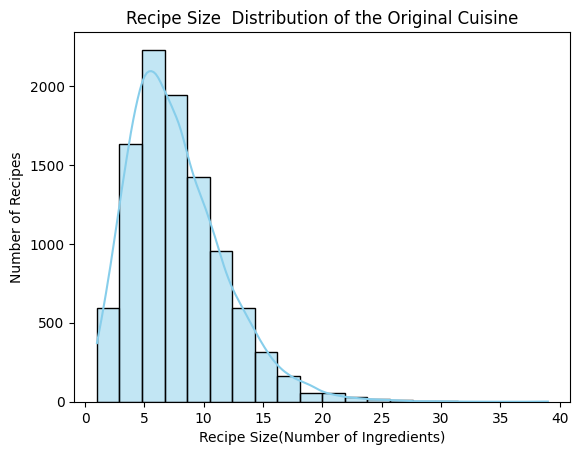

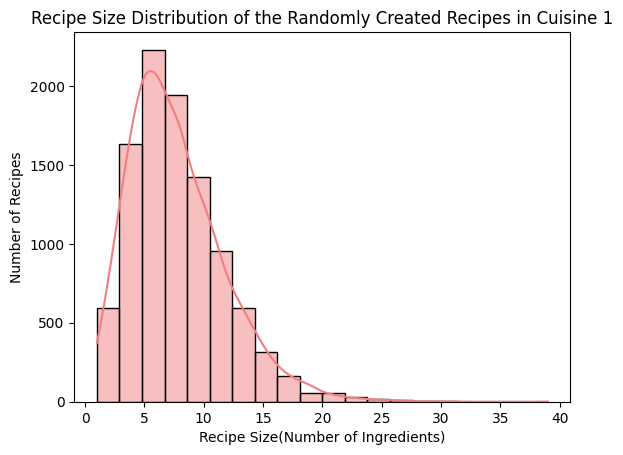

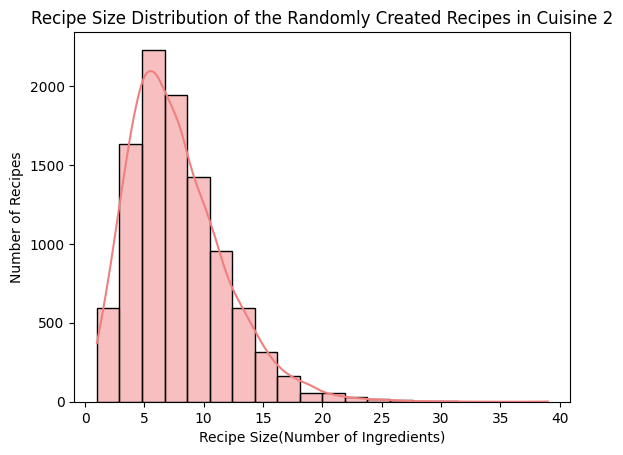

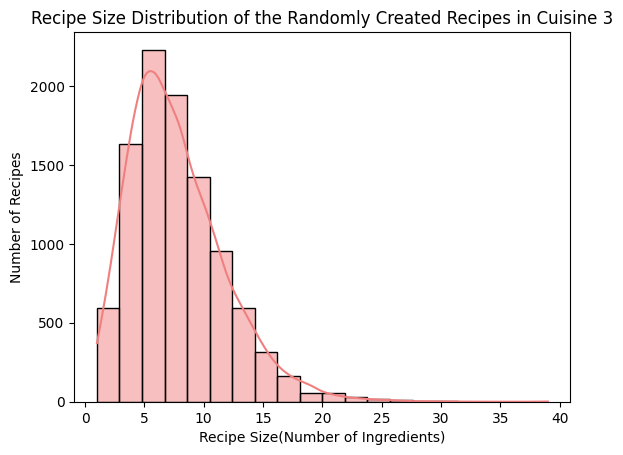

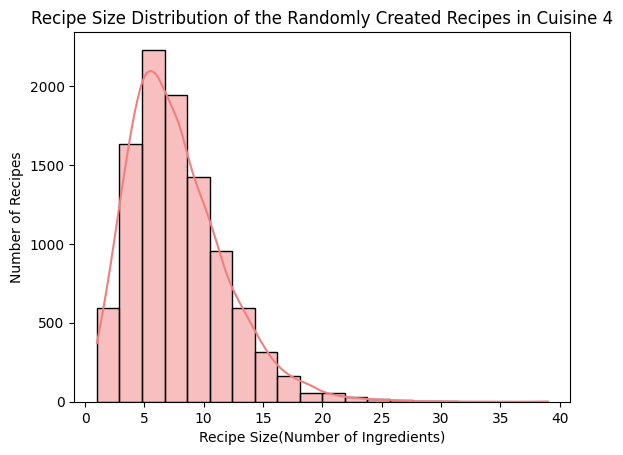

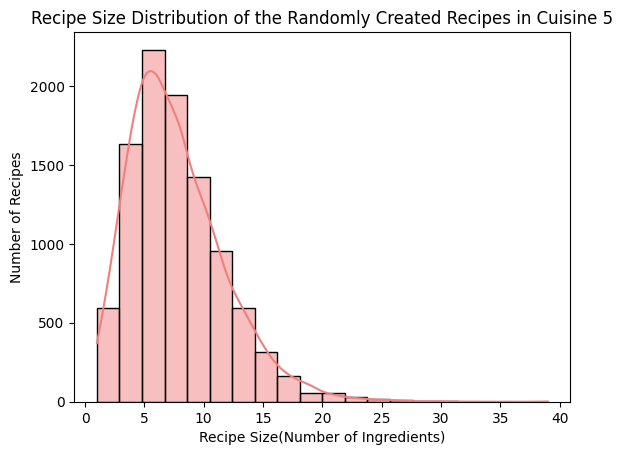

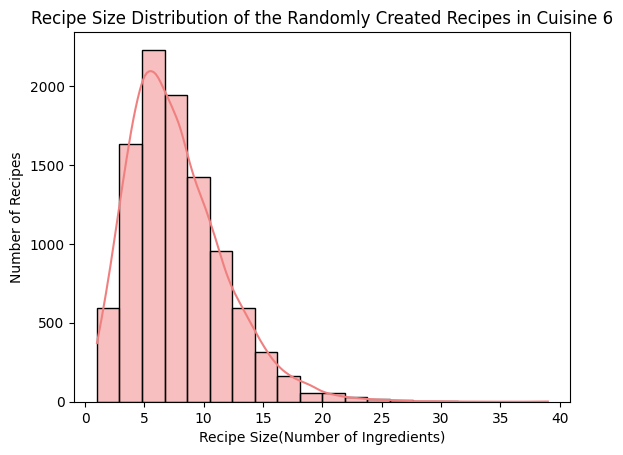

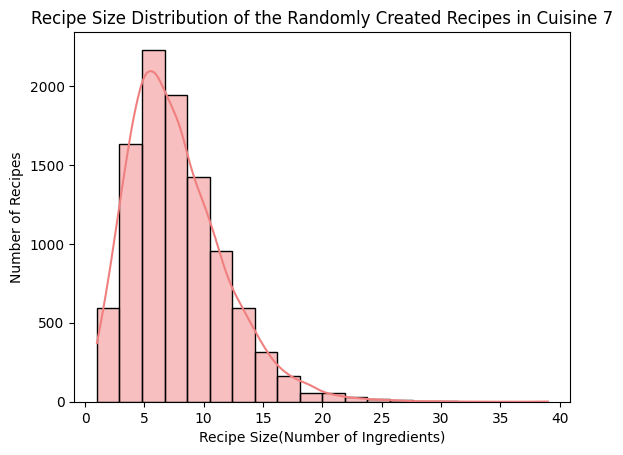

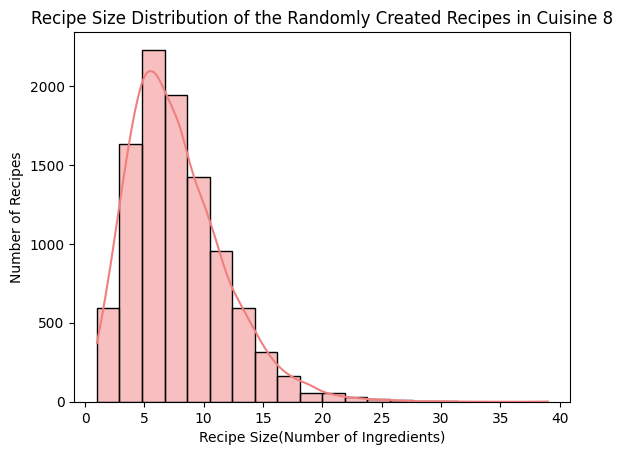

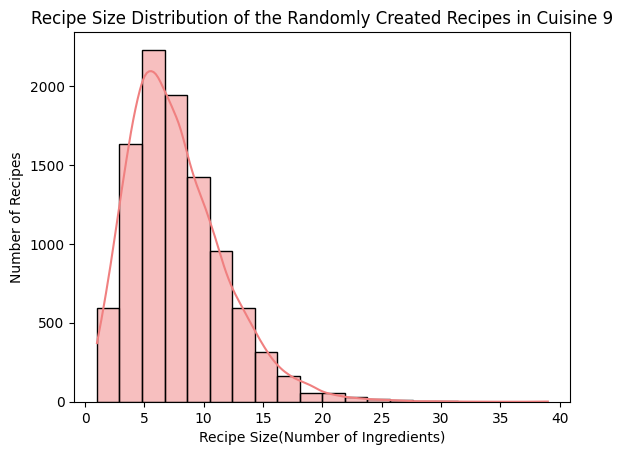

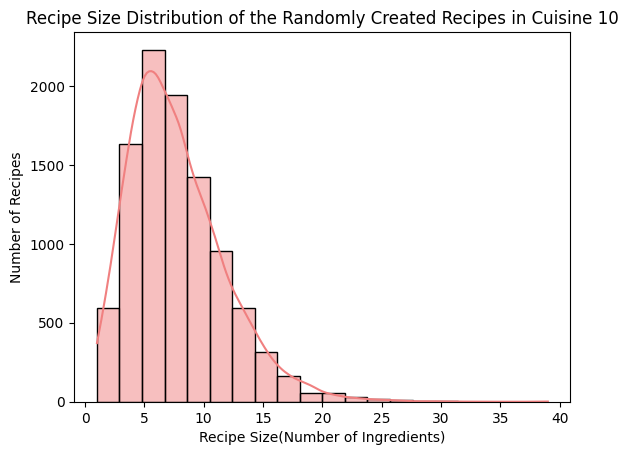

In [220]:
#Plot the recipe size distribution of the original cuisine and the randomly created recipes in 10 sets.

import matplotlib.pyplot as plt

#put headings in the plot
plt.title('Recipe Size  Distribution of the Original Cuisine')
recipe_size = []
for i in range(0, len(df_cuisine_ini)):
    recipe_size.append(len(grouped_ingredients['ingredients'][i]))
                    
#give x and y labels
plt.xlabel('Recipe Size(Number of Ingredients)')
plt.ylabel('Number of Recipes')
sns.histplot(recipe_size, bins=20, color='skyblue', kde=True)
plt.savefig('Q2_plots/Q2a_original_cuisine_recipe_size_distribution.png')
plt.show()

#put headings in the plot
for i in range(0, no_of_cuisines):
    recipe_size = []
    for j in range(0, len(size_controlled_cuisines[i])):
        recipe_size.append(len(size_controlled_cuisines[i]['ingredients'][j]))
    plt.title('Recipe Size Distribution of the Randomly Created Recipes in Cuisine '+str(i+1))

    #give x and y labels
    plt.xlabel('Recipe Size(Number of Ingredients)')
    plt.ylabel('Number of Recipes')
    sns.histplot(recipe_size, bins=20, color='lightcoral', kde=True)
    file_name = 'Q2_plots/Q2a_randomly_created_cuisine_'+str(i+1)+'_recipe_size_distribution.png'
    plt.savefig(file_name)
    plt.show()

#make plots for all the randomly created cuisines in a single plot



# Q2 b

<Axes: title={'center': 'Recipe Size Distribution of the Original Cuisine'}, xlabel='Recipe Size(Number of Ingredients)', ylabel='Number of Recipes'>

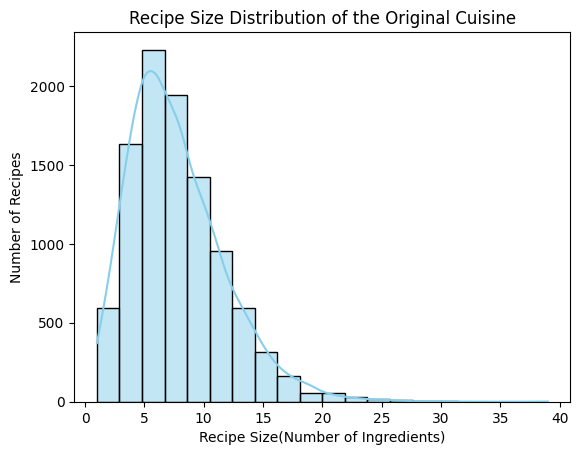

In [221]:
#recipe size distribution of the original cuisine
recipe_size = []
for i in range(0, len(df_cuisine_ini)):
    recipe_size.append(len(grouped_ingredients['ingredients'][i]))

plt.xlabel('Recipe Size(Number of Ingredients)')
plt.ylabel('Number of Recipes')

plt.title('Recipe Size Distribution of the Original Cuisine')
sns.histplot(recipe_size, bins=20, color='skyblue', kde=True)


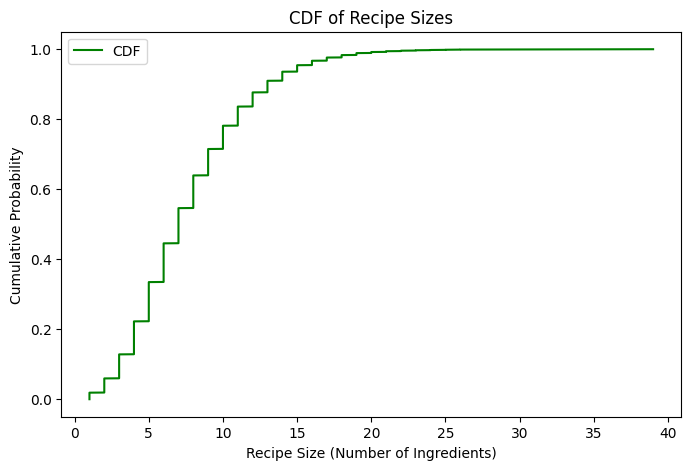

In [222]:

sorted_recipe_size = np.sort(recipe_size)
cdf = np.arange(1, len(sorted_recipe_size) + 1) / len(sorted_recipe_size)

plt.figure(figsize=(8, 5))
plt.plot(sorted_recipe_size, cdf, label='CDF', color='green')

plt.xlabel('Recipe Size (Number of Ingredients)')
plt.ylabel('Cumulative Probability')
plt.title('CDF of Recipe Sizes')
plt.legend()
plt.show()


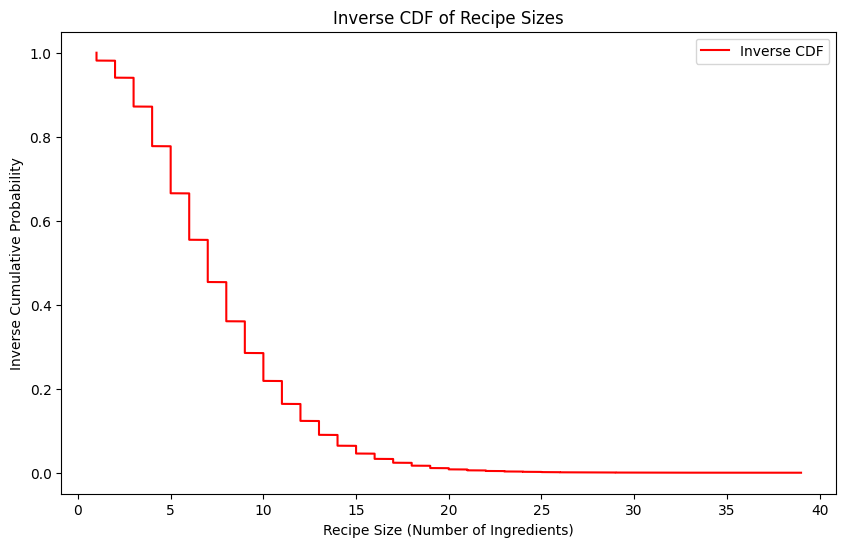

In [223]:
plt.figure(figsize=(10, 6))
plt.plot(sorted_recipe_size, 1 - cdf, label='Inverse CDF', color='red')

plt.xlabel('Recipe Size (Number of Ingredients)')
plt.ylabel('Inverse Cumulative Probability')
plt.title('Inverse CDF of Recipe Sizes')
plt.legend()

# Show the plot
plt.show()


In [228]:
cuisine_recipe_size = []

for i in range(0, 100000):
    random_prob = np.random.uniform(0, 1)
    x_intercept = np.interp(random_prob, cdf, sorted_recipe_size)
    cuisine_recipe_size.append(x_intercept)
    

In [229]:
len(cuisine_recipe_size)

100000

In [230]:

d={}
d['recipe_id'] = []
d['ingredients'] = []
for i in range(0, len(df_cuisine_ini)*10):
    n = int(cuisine_recipe_size[i])
    ingredient_random = ingredients_df['ingredient'].sample(n=n).to_list()
    d['recipe_id'].append("R"+str(i+1))
    d['ingredients'].append(ingredient_random)
size_controlled_cuisines_inv_trfm_df = pd.DataFrame(d)



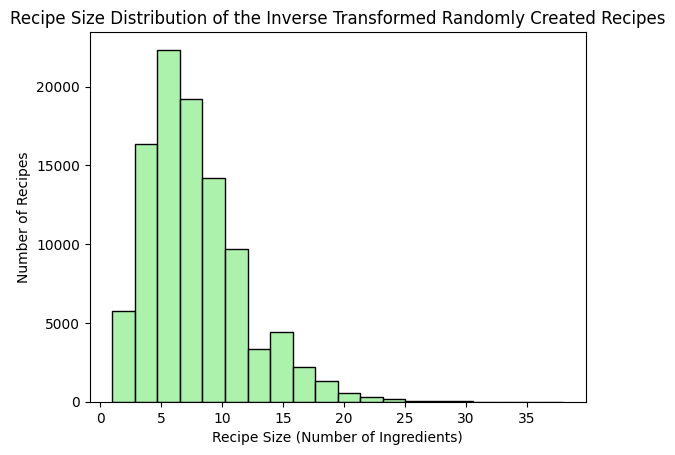

In [231]:

recipe_size = []
for j in range(0, len(size_controlled_cuisines_inv_trfm_df)):
    recipe_size.append(len(size_controlled_cuisines_inv_trfm_df['ingredients'][j]))

len(recipe_size)
plt.title('Recipe Size Distribution of the Inverse Transformed Randomly Created Recipes')
sns.histplot(recipe_size, bins=20, color='lightgreen')
plt.xlabel('Recipe Size (Number of Ingredients)')
plt.ylabel('Number of Recipes')
plt.savefig('Q2_plots/Q2b_inverse_transformed_randomly_created_recipe_size_distribution.png')
plt.show()
